## Welcome
This is a personal project I am currently working on to practice visualisation techniques using Seaborn and Matplotlip.
I will be using various data frames throughout this notebook. The first is a personal daily record of my hours coding, kilometers ran, chess rating, weight et al.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import numpy as np

% matplotlib inline
% reload_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


In [2]:
file_path_1 = r"C:\Users\McKinley Alex\PycharmProjects\app.py\Utils\Self-Checker\record 2023.xlsx"
excel_file_1 = pd.ExcelFile(file_path_1)
file_path_2 = r"C:\Users\McKinley Alex\PycharmProjects\app.py\Utils\Self-Checker\record 2024.xlsx"
excel_file_2 = pd.ExcelFile(file_path_2)

dfs = []

def read_sheets(excel_file):
    for sheet_name in excel_file.sheet_names:
        if sheet_name.lower() != 'totals':  # Check if sheet name is not 'totals'
            df = pd.read_excel(excel_file, sheet_name=sheet_name)
            dfs.append(df)

read_sheets(excel_file_1)
read_sheets(excel_file_2)

total_df = pd.concat(dfs, ignore_index=True)

print(total_df)

                    Date  Weight  Running  Code     Elo  Drinking  Smoking  \
0    2023-10-01 00:00:00    88.0     0.00   1.0  1436.0       1.0      1.0   
1                    NaN     NaN      NaN   1.0     NaN       1.0      1.0   
2                    NaN     NaN     4.00   1.0     NaN       0.0      1.0   
3                    NaN     NaN     2.00   1.0     NaN       1.0      1.0   
4                    NaN     NaN      NaN   1.0     NaN       1.0      1.0   
..                   ...     ...      ...   ...     ...       ...      ...   
255           2024-06-12    88.0     0.00   1.0  1416.0       0.0      1.0   
256  2024-06-13 00:00:00    89.0     4.45   2.5  1416.0       0.0      1.0   
257  2024-06-14 00:00:00    89.0     4.40   2.0  1416.0       0.0      1.0   
258  2024-06-15 00:00:00    88.0     0.00   3.0  1416.0       1.0      1.0   
259  2024-06-16 00:00:00    89.0     0.00   3.0  1416.0       0.0      1.0   

      Money   BP  
0       0.0  NaN  
1    1500.0  NaN  
2     

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10324\3612391238.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total_df = pd.concat(dfs, ignore_index=True)


# My Running

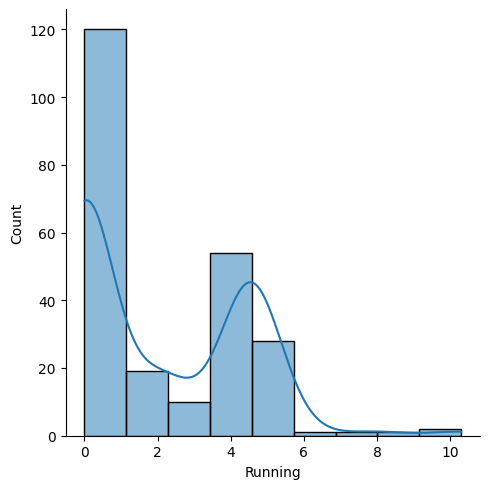

In [3]:
sns.displot(total_df['Running'], kde=True)

Of course, most of the days in the database are when my runs weren't recorded.

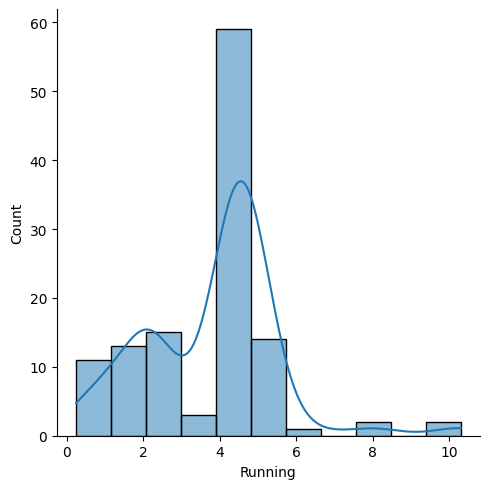

In [9]:
filtered_running_df = total_df[total_df['Running'] > 0]

sns.displot(filtered_running_df['Running'], kde=True)

If I remove the days that I didn't record a run, we can see that I usually less than 5kms per day, with an average at around 4.5kms.

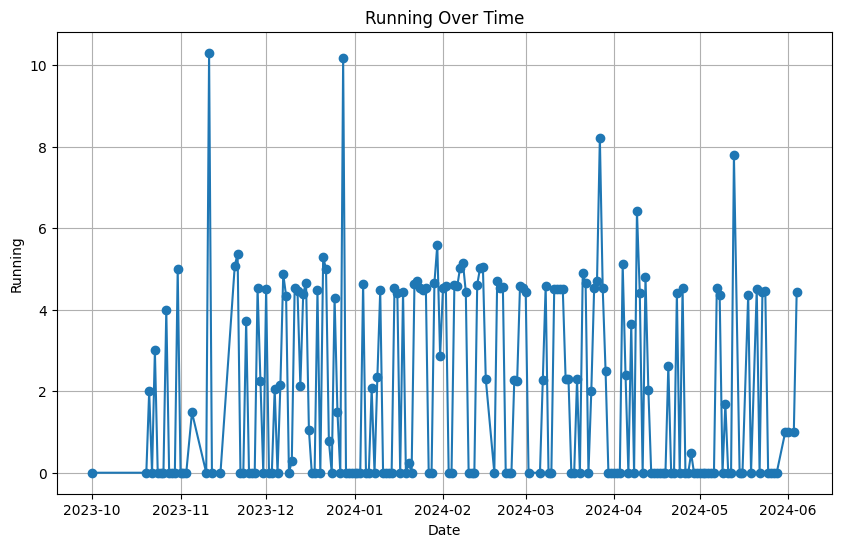

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

total_df['Date'] = pd.to_datetime(total_df['Date'])

total_df = total_df.sort_values(by='Date')

plt.figure(figsize=(10, 6))
plt.plot(total_df['Date'], total_df['Running'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Running')
plt.title('Running Over Time')
plt.grid(True)

# Show the plot
plt.show()


Here we can still see the days I didn't run, but can quite clearly see how much I run on average.

# My Coding

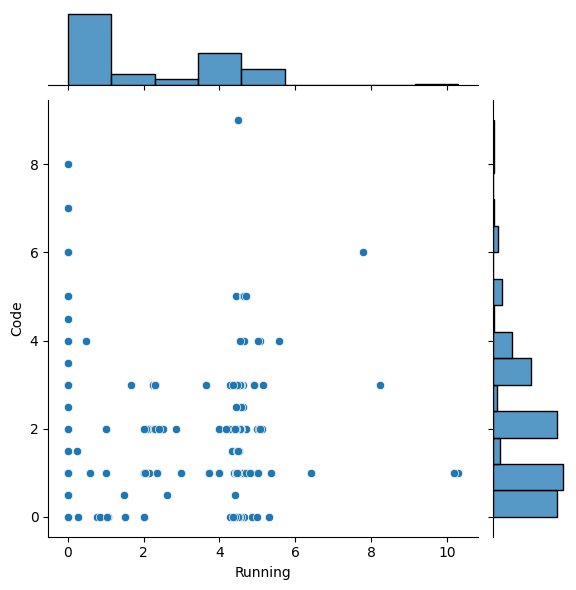

In [37]:
sns.jointplot(x='Running', y='Code', data=total_df, kind='scatter')

This joint plot seems pretty useless at helping me visualise the connection between coding and running.

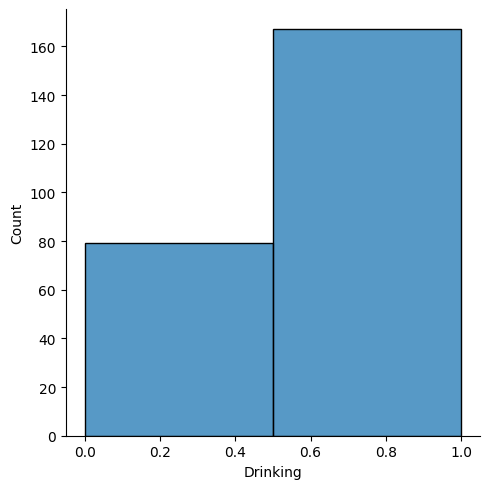

In [11]:
sns.displot(total_df['Drinking'], bins=2)

This makes it pretty clear how often I drink vs don't drink for the past 277 days

In [20]:
# Assuming total_df is your DataFrame and 'Date' is the column with dates in string format
# Convert the 'Date' column to datetime
total_df['Date'] = pd.to_datetime(total_df['Date'], format='ISO8601')

# Filter the DataFrame for dates greater than 01/01/2024
this_year_drinking_df = total_df[total_df['Date'] > pd.Timestamp('01-01-2024')]

# Display the filtered DataFrame
print(this_year_drinking_df['Drinking'])

93     0.0
94     1.0
95     0.0
96     1.0
97     1.0
      ... 
249    0.0
250    0.0
251    1.0
252    0.0
253    0.0
Name: Drinking, Length: 150, dtype: float64


In [22]:
# Assuming total_df is your DataFrame and 'Date' is the column with dates in string format
# Convert the 'Date' column to datetime
total_df['Date'] = pd.to_datetime(total_df['Date'], format='ISO8601')

# Filter the DataFrame for dates greater than 01/01/2024
last_year_drinking_df = total_df[total_df['Date'] < pd.Timestamp('01-01-2024')]

# Display the filtered DataFrame
print(last_year_drinking_df['Drinking'])

0     1.0
19    0.0
20    1.0
21    1.0
22    1.0
     ... 
87    1.0
88    1.0
89    0.0
90    1.0
91    1.0
Name: Drinking, Length: 63, dtype: float64


## Last year
*Since October*

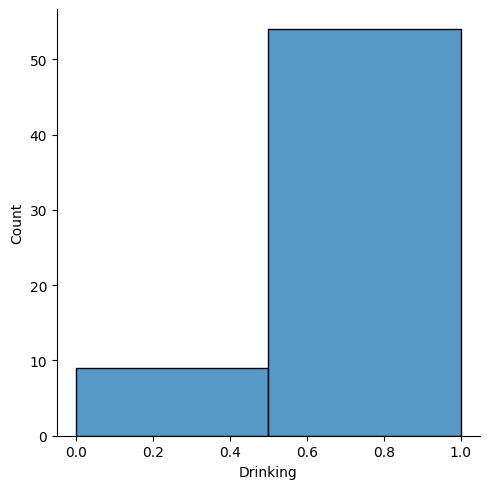

In [23]:
sns.displot(last_year_drinking_df['Drinking'], bins=2)

## This year
*Until June*

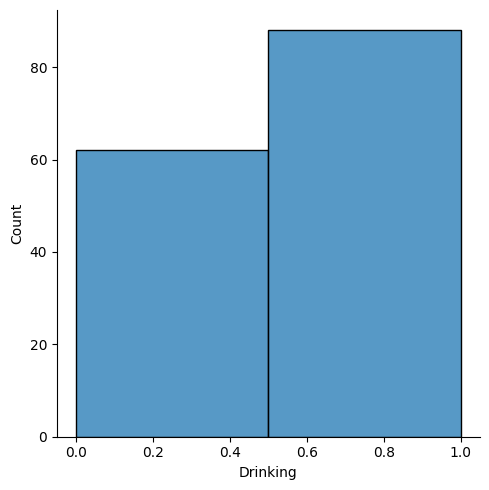

In [21]:
sns.displot(this_year_drinking_df['Drinking'], bins=2)

## As a line chart

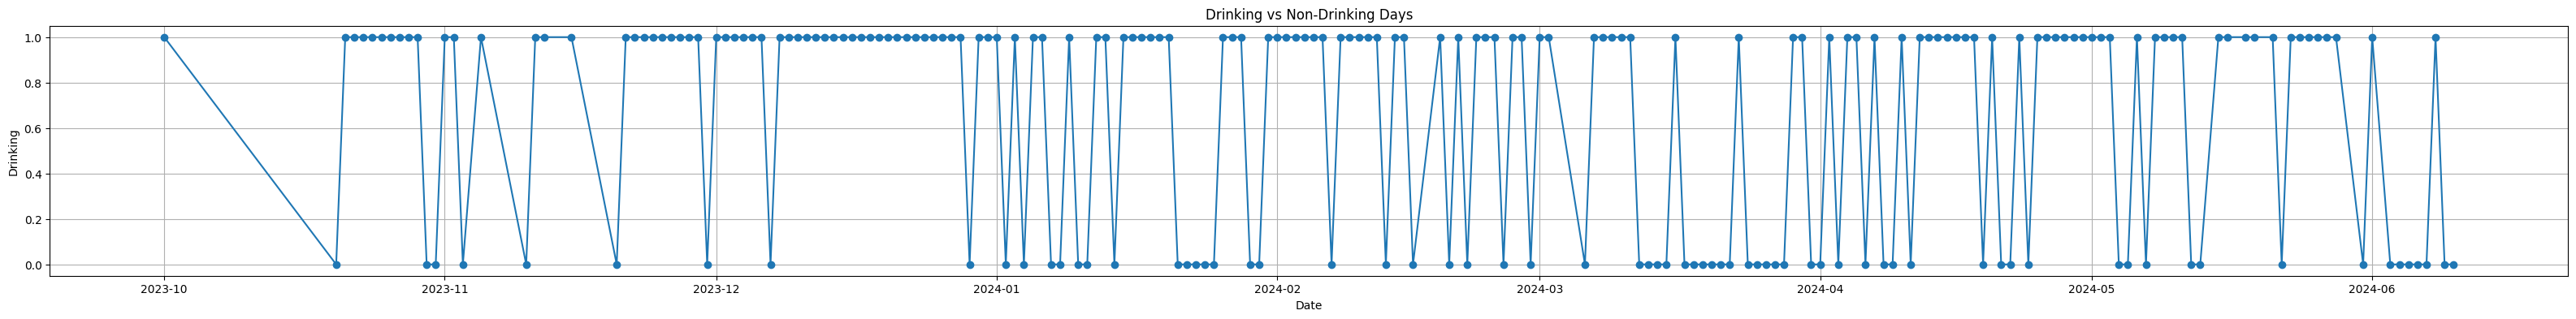

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

total_df['Date'] = pd.to_datetime(total_df['Date'])

total_df = total_df.sort_values(by='Date')

plt.figure(figsize=(40, 4))
plt.plot(total_df['Date'], total_df['Drinking'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Drinking')
plt.title('Drinking vs Non-Drinking Days')
plt.grid(True)

# Show the plot
plt.show()

**It's hard to really see, but it's clear that the days without drinking increase over time.**

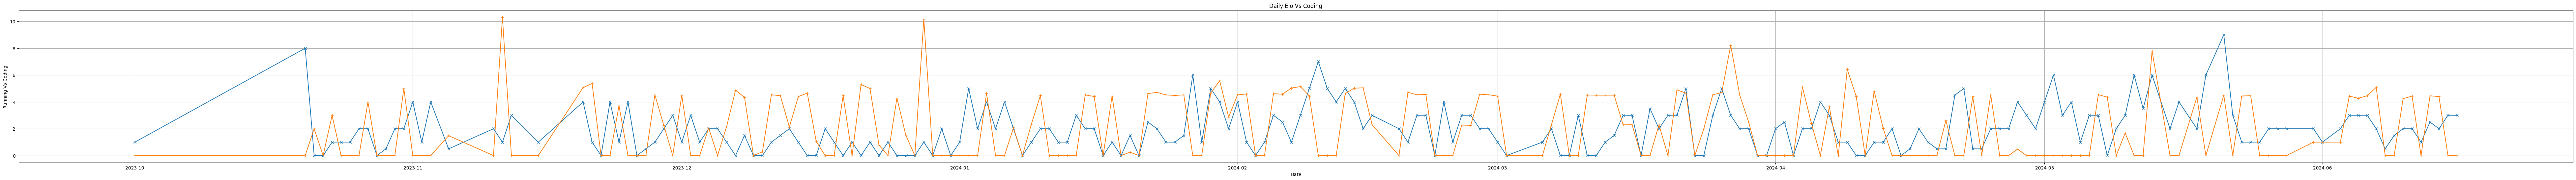

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

total_df['Date'] = pd.to_datetime(total_df['Date'])

total_df = total_df.sort_values(by='Date')

plt.figure(figsize=(100, 6))
plt.plot(total_df['Date'], total_df['Code'], marker='x', linestyle='-')
plt.plot(total_df['Date'], total_df['Running'], marker='+', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Running Vs Coding')
plt.title('Daily Elo Vs Coding')
plt.grid(True)

# Show the plot
plt.show()

**Here we can see the correlation between running (kms) and coding (hrs)**

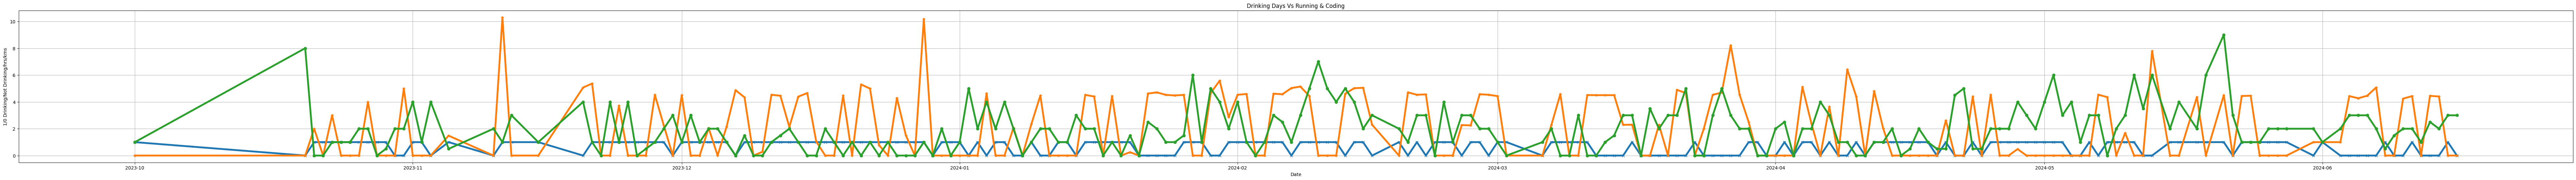

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

total_df['Date'] = pd.to_datetime(total_df['Date'])

total_df = total_df.sort_values(by='Date')

plt.figure(figsize=(100, 6))
plt.plot(total_df['Date'], total_df['Drinking'], marker='x', linestyle='-', markerfacecolor="yellow", linewidth="4")
plt.plot(total_df['Date'], total_df['Running'], marker='*', linestyle='-', linewidth="4")
plt.plot(total_df['Date'], total_df['Code'], marker='o', linestyle='-', linewidth="4")
plt.xlabel('Date')
plt.ylabel('1/0 Drinking/Not Drinking/hrs/kms')
plt.title('Drinking Days Vs Running & Coding')
plt.grid(True)

# Show the plot
plt.show()

**It's not very obvious here but there is a clear relation to a steep drop in coding, and running after consecutive drinking days.**

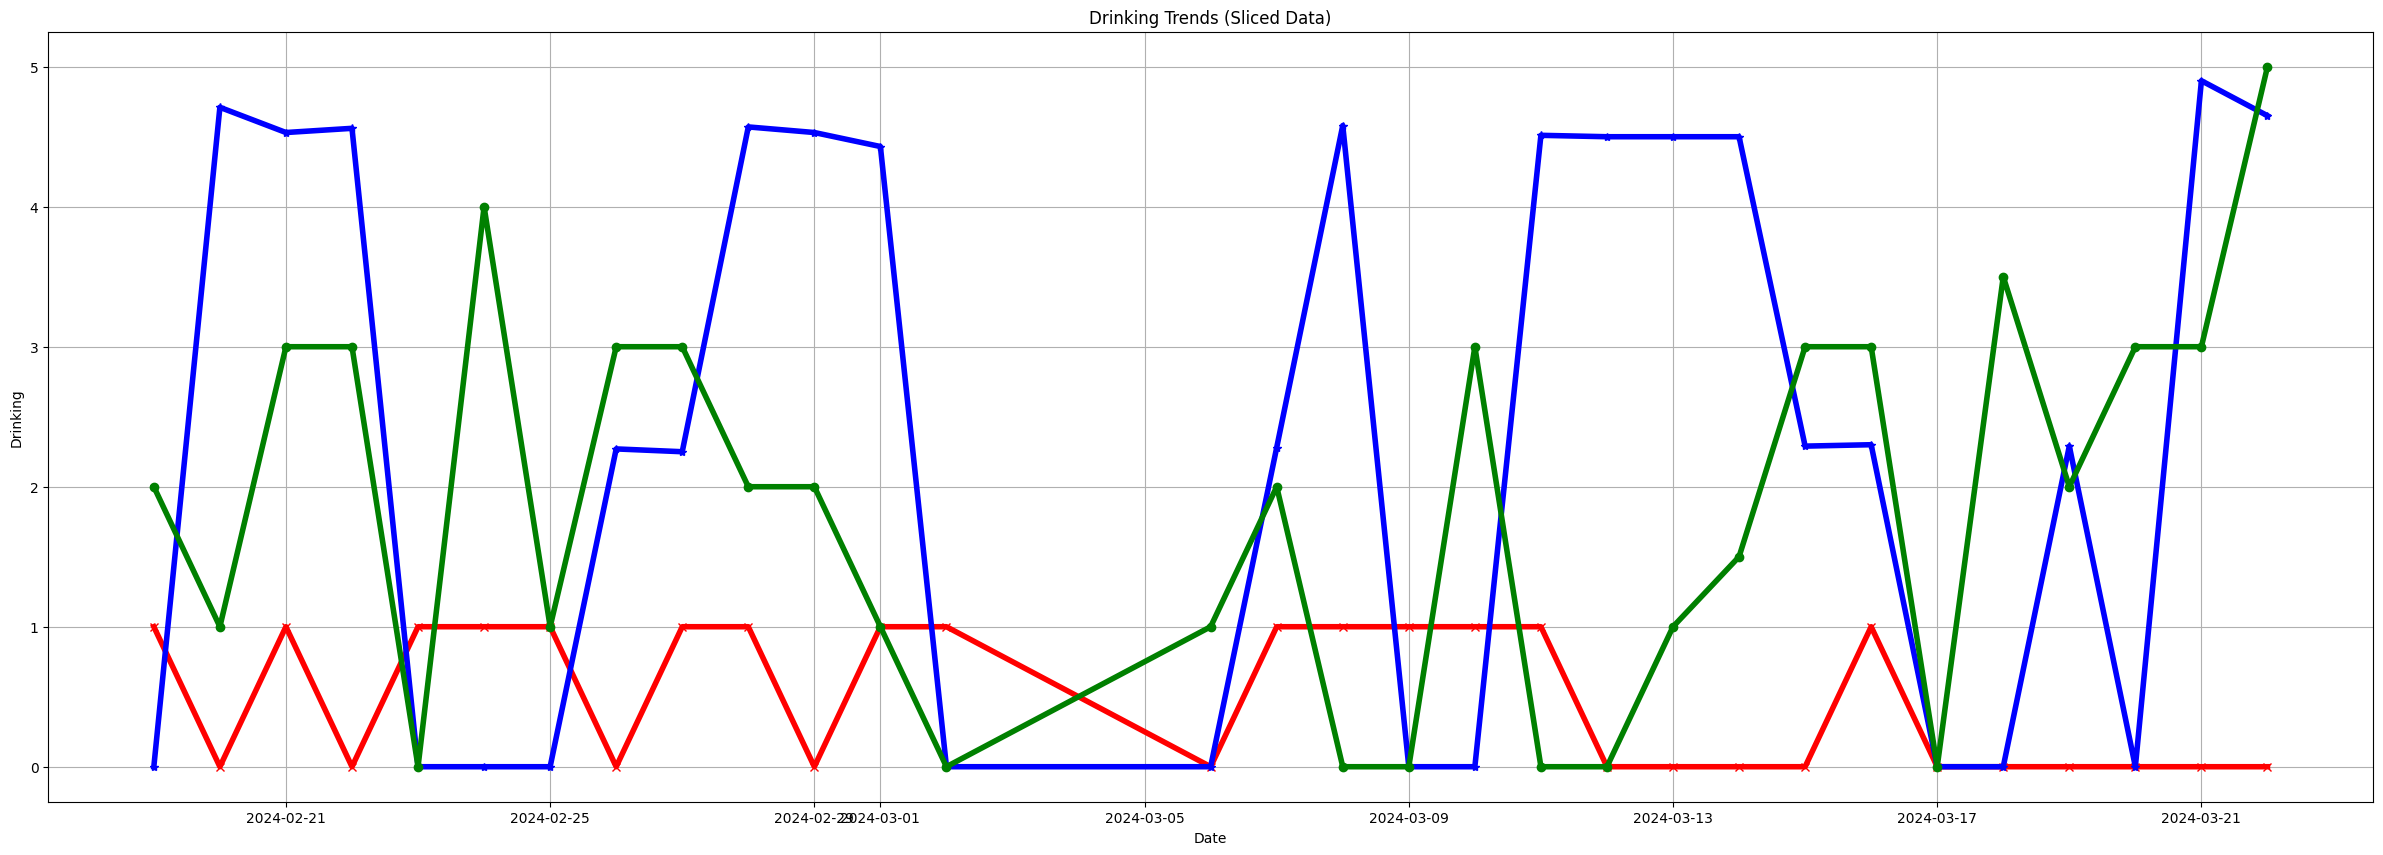

In [36]:
start = 110  # starting index
end = 140    # ending index

# Slice the DataFrame
plt.figure(figsize=(30, 10))
sliced_df = total_df.iloc[start:end]
plt.plot(sliced_df['Date'], sliced_df['Drinking'], marker='x', linestyle='-', color='red', linewidth="4")
plt.plot(sliced_df['Date'], sliced_df['Running'], marker='*', linestyle='-', color='blue', linewidth="4")
plt.plot(sliced_df['Date'], sliced_df['Code'], marker='o', linestyle='-', color='green', linewidth="4")
plt.title('Drinking Trends (Sliced Data)')
plt.xlabel('Date')
plt.ylabel('Drinking')
plt.grid(True)
plt.show()


*By slicing a piece of this data, it's much easier to gain some insights. Running and coding are more or less related. Drinking affects running more than coding.*